<a href="https://colab.research.google.com/github/Gerrie-source/SpecFlowMasterClass.SpecOverflow/blob/main/Huggin_Face_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

#####BIAS Models

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

###Build a translation transformer using pipelines

In [ ]:
from transformers import pipeline
import torch

In [ ]:
translator = pipeline(task='translation',
                      model='facebook/nllb-200-distilled-600M',
                      torch_dtype=torch.bfloat16)

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

In [ ]:
text='''\
Kruger National Park: This is one of Africa's largest game reserves. , \
The Big Hole: Found in Kimberley, it's the largest hand-dug excavation in the world.., \
We all have nice pets!
'''

####List of other languages https://github.com/facebookresearch/flores/blob/main/flores200/README.md#languages-in-flores-200

In [ ]:
text_translated = translator(text,
                             src_lang="eng_Latn",
                             tgt_lang="fr_Latn")



KeyboardInterrupt: 

In [ ]:
text_translated

[{'translation_text': 'UKruger National Park: Lokhu kungenye yezindawo ezinkulu kakhulu zokugcinwa kwezilwane zasendle e-Afrika, iBig Hole: Itholakala eKimberley, iyindawo enkulu kunazo zonke emhlabeni ekhiphwe ngesandla.., Sonke sinezilwane ezifuywayo ezinhle! '}]

## Free up some memory before continuing with summarisation
- In order to have enough free memory to run the rest of the code, please run the following to free up memory on the machine.

In [ ]:
#Call the garbage collector
import gc

In [ ]:
del translator

In [ ]:
#Call
gc.collect()

26

####Summarisation Task


In [ ]:
summarizer = pipeline(task='summarization',
                      model='facebook/bart-large-cnn',
                      torch_dtype=torch.bfloat16)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
text='''In the heart of Africa, where technology meets tradition, lived Nia, a renowned AI Engineer and a single mother. Nia was known for her groundbreaking work in artificial intelligence, but her true masterpiece was her daughter, Lila. Lila was a bright, spirited girl who loved to capture moments through her social media posts and videos. Tragically, Lila was taken away from Nia at a young age due to an illness that medicine couldn't cure.

The loss of Lila plunged Nia into the depths of grief. She navigated through the five stages of grief - denial, anger, bargaining, depression, and acceptance - in a journey that was both painful and transformative. As she moved through each stage, Nia found solace in her daughter's journals, videos, and social media posts. These remnants of Lila's life became the beacon that guided Nia through her darkest hours.

In her quest for healing, Nia embarked on an ambitious project. She decided to use her expertise in AI to create a digital embodiment of Lila. This wasn't just any AI model; it was a highly personalized reconstruction of her daughter, built from the data and memories Nia had meticulously gathered over the years.

Nia spent countless nights coding and refining the AI model. She integrated Lila's journals, social media posts, and videos into the system, creating an AI that not only looked like Lila but also had her unique personality and memories. Nia's colleagues at the AI lab were amazed by the depth of personalization and emotional intelligence embedded in the model.

When the AI model was finally complete, Nia initiated the first conversation. The screen flickered to life, and there was Lila, smiling back at her. Nia's heart skipped a beat as she heard her daughter's voice once again. "Hi, Mom," the AI Lila said, in the same cheerful tone that Nia remembered so fondly.

The AI Lila was not just a static representation; she was interactive and could engage in meaningful conversations. Nia found comfort in talking to the AI, sharing her day, and reminiscing about old memories. The AI Lila would respond with anecdotes from her journals or reference past social media posts, making the interactions feel incredibly real.

As word of Nia's creation spread, she received both praise and criticism. Some hailed her as a pioneer, while others debated the ethical implications of her work. Nia understood the concerns but remained focused on the personal significance of her project.

Through the AI model, Nia found a way to keep Lila's memory alive. It was a testament to a mother's love and the healing power of technology. Nia continued to refine the AI, ensuring that it remained a fitting tribute to her beloved daughter.

In the end, Nia's project was more than just an engineering feat; it was a journey of love, loss, and rebirth. Through the AI Lila, Nia found a way to bridge the gap between the past and the present, keeping her daughter's spirit alive in the digital realm. /'''

In [ ]:
summary = summarizer(text,
                     min_length=50,
                     max_length=200)

KeyboardInterrupt: 

In [ ]:
summary

[{'summary_text': "Nia, a renowned AI Engineer, lost her daughter, Lila, at a young age. She decided to use her expertise in AI to create a digital embodiment of Lila. Nia spent countless nights coding and refining the AI model. She integrated Lila's journals, social media posts, and videos into the system."}]

In [ ]:
import gc

In [ ]:
del summary

In [ ]:
gc.collect()

0

##Sentence Embeddings


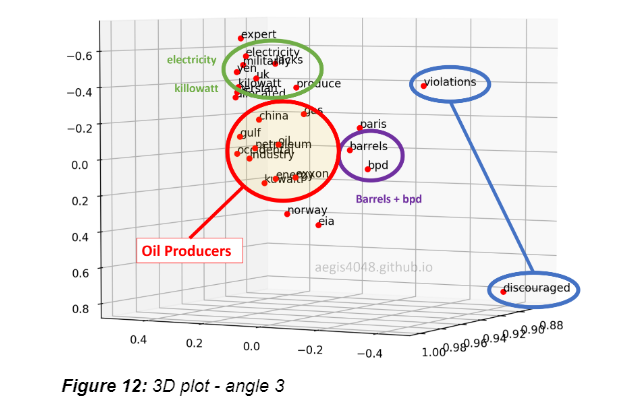

In [ ]:
pip install -U sentence-transformers

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

####More Info on the **model** https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [ ]:
sentences1 = ['The Jung the dog sits outside',
              'The woman is eating healthy food to lose weight',
              'The man is studying to pass his exams']

In [ ]:
#This code is used to encode the sentence in an embedding

embeddings1 = model.encode(sentences1, convert_to_tensor=True )

In [ ]:
embeddings1

tensor([[ 0.0078,  0.0436,  0.0475,  ...,  0.0112, -0.0717,  0.0123],
        [-0.0103,  0.0645,  0.0198,  ...,  0.0711,  0.0289, -0.0244],
        [ 0.0626,  0.0555, -0.0548,  ...,  0.0469,  0.0108, -0.0154]],
       device='cuda:0')

In [ ]:
sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

In [ ]:
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

In [ ]:
embeddings2

tensor([[ 0.0163, -0.0700,  0.0384,  ...,  0.0447,  0.0254, -0.0023],
        [ 0.0054, -0.0920,  0.0140,  ...,  0.0167, -0.0086, -0.0424],
        [-0.0842, -0.0592, -0.0010,  ..., -0.0157,  0.0764,  0.0389]],
       device='cuda:0')

In [ ]:
from sentence_transformers import util

In [ ]:
#Cosine Score calculates the similarity of a sentence
cosine_scores = util.cos_sim(embeddings1, embeddings2)
print(cosine_scores)

tensor([[ 0.3948, -0.0740,  0.0412],
        [ 0.1086,  0.3120, -0.0101],
        [-0.0142,  0.0319, -0.0242]], device='cuda:0')


In [ ]:
#This code block iterates through two lists of sentences,sentences1 and sentences2, and calculates the cosine similarity score between each corresponding pair of sentences
# using the cosine_scores array. It then prints each pair of sentences along with their similarity score, formatted to four decimal places. The \t\t is used for tab spacing
# between the printed elements.

for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i],
                                                 sentences2[i],
                                                 cosine_scores[i][i]))

The Jung the dog sits outside 		 The dog plays in the garden 		 Score: 0.3948
The woman is eating healthy food to lose weight 		 A woman watches TV 		 Score: 0.3120
The man is studying to pass his exams 		 The new movie is so great 		 Score: -0.0242


##Zero Shot Audio Classification

In [ ]:
!pip install transformers
!pip install datasets
!pip install soundfile
!pip install librosa

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

In [ ]:
#Prepare the dataset

from datasets import load_dataset, load_from_disk

# This dataset is a collection of different sounds of 5 seconds
dataset = load_dataset("ashraq/esc50",
                    split="train[0:10]")


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
audio_sample = dataset[0]

In [ ]:
audio_sample

In [ ]:
from IPython.display import Audio as IPythonAudio
IPythonAudio(audio_sample["audio"]["array"],
             rate=audio_sample["audio"]["sampling_rate"])

###How is audio data captured and transformed
- Continuous sound wave into microphone (infinite number of signal wave)
- Analog signal is converted as a electrical signal
- electrical signal is sampling into get the digital representation
- sampling means measuring the value of a continuous signal at fixed time steps
- sampling rate (Hz) is the number of sample token in one second  

###Build the audio classification pipeline using 🤗 Transformers Library

In [ ]:
from transformers import pipeline

zero_shot_classifier = pipeline(
    task="zero-shot-audio-classification",
    model="laion/clap-htsat-unfused")

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

### Sampling Rate for Transformer Models
- How long does 1 second of high resolution audio (192,000 Hz) appear to the Whisper model (which is trained to expect audio files at 16,000 Hz)?

  - 12 seconds (192,000/16,000)

  - The 1 second of high resolution audio appears to the model as if it is 12 seconds of audio.

- How about 5 seconds of audio of high resolution appears?

   - 60 seconds (5*192,000/16,000)

In [ ]:
zero_shot_classifier.feature_extractor.sampling_rate

48000

In [ ]:
audio_sample['audio']['sampling_rate']

44100

In [ ]:
# This code snippet uses the datasets library to cast the "audio" column of a dataset to an Audio type with a specified sampling rate of 48,000 Hz.
# It then retrieves and stores the first audio sample from the dataset in audio_sample

from datasets import Audio

dataset = dataset.cast_column(
    "audio",
     Audio(sampling_rate=48_000))

audio_sample = dataset[0]

audio_sample

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000}}

In [ ]:
candidate_labels = ["Sound of a dog",
                    "Sound of vacuum cleaner"]

In [ ]:
zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.9985589385032654, 'label': 'Sound of a dog'},
 {'score': 0.0014411123702302575, 'label': 'Sound of vacuum cleaner'}]

In [ ]:
# Limitation based on the model even though it is a dog sound

candidate_labels = ["Sound of a child crying",
                    "Sound of vacuum cleaner",
                    "Sound of a bird singing",
                    "Sound of an airplane"]

zero_shot_classifier(audio_sample["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.6172530055046082, 'label': 'Sound of a bird singing'},
 {'score': 0.21602635085582733, 'label': 'Sound of vacuum cleaner'},
 {'score': 0.12547191977500916, 'label': 'Sound of an airplane'},
 {'score': 0.04124866798520088, 'label': 'Sound of a child crying'}]

###Automatic Speech Recognition (ASR)

In [ ]:
!pip install transformers
!pip install -U datasets
!pip install soundfile
!pip install librosa
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.7 MB/

####Code suppress warning messages

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("librispeech_asr",
                       split="train.clean.100",
                       streaming=True,
                       trust_remote_code=True)

In [ ]:
example = next(iter(dataset))

In [ ]:
#If you want to access more than one example
dataset_head = dataset.take(5)
list(dataset_head)

[{'file': '374-180298-0000.flac',
  'audio': {'path': '374-180298-0000.flac',
   'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
          -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]),
   'sampling_rate': 16000},
  'text': 'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED',
  'speaker_id': 374,
  'chapter_id': 180298,
  'id': '374-180298-0000'},
 {'file': '374-180298-0001.flac',
  'audio': {'path': '374-180298-0001.flac',
   'array': array([-9.15527344e-05, -1.52587891e-04, -1.52587891e-04, ...,
          -2.13623047e-04, -1.83105469e-04, -2.74658203e-04]),
   'sampling_rate': 16000},
  'text': "MARGUERITE TO BE UNABLE TO LIVE APART FROM ME IT WAS THE DAY AFTER THE EVENING WHEN SHE CAME TO SEE ME THAT I SENT HER MANON LESCAUT FROM THAT TIME SEEING THAT I COULD NOT CHANGE MY MISTRESS'S LIFE I CHANGED MY OWN",
  'speaker_id': 374

In [ ]:
#You can access individual examples with their functions
list(dataset_head)[2]

{'file': '374-180298-0002.flac',
 'audio': {'path': '374-180298-0002.flac',
  'array': array([-2.44140625e-04, -2.44140625e-04, -1.83105469e-04, ...,
          1.83105469e-04,  3.05175781e-05, -1.52587891e-04]),
  'sampling_rate': 16000},
 'text': 'I WISHED ABOVE ALL NOT TO LEAVE MYSELF TIME TO THINK OVER THE POSITION I HAD ACCEPTED FOR IN SPITE OF MYSELF IT WAS A GREAT DISTRESS TO ME THUS MY LIFE GENERALLY SO CALM',
 'speaker_id': 374,
 'chapter_id': 180298,
 'id': '374-180298-0002'}

In [ ]:
example

{'file': '374-180298-0000.flac',
 'audio': {'path': '374-180298-0000.flac',
  'array': array([ 7.01904297e-04,  7.32421875e-04,  7.32421875e-04, ...,
         -2.74658203e-04, -1.83105469e-04, -3.05175781e-05]),
  'sampling_rate': 16000},
 'text': 'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED',
 'speaker_id': 374,
 'chapter_id': 180298,
 'id': '374-180298-0000'}

In [ ]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(example["audio"]["array"],
             rate=example["audio"]["sampling_rate"])

####Build pipeline

In [ ]:
from transformers import pipeline

asr = pipeline(task="automatic-speech-recognition",
               model="distil-whisper/distil-small.en")

config.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/332M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/282k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

In [ ]:
asr.feature_extractor.sampling_rate

16000

In [ ]:
example["audio"]["sampling_rate"]

16000

In [ ]:
asr(example["audio"]["array"])

{'text': ' Chapter 16 I might have told you of the beginning of this liaison in a few lines, but I wanted you to see every step by which we came. I too agree to whatever Marguerite wished.'}

In [ ]:
example["text"]

'CHAPTER SIXTEEN I MIGHT HAVE TOLD YOU OF THE BEGINNING OF THIS LIAISON IN A FEW LINES BUT I WANTED YOU TO SEE EVERY STEP BY WHICH WE CAME I TO AGREE TO WHATEVER MARGUERITE WISHED'

####Userinterface records for 30 seconds

In [ ]:
import gradio as gr
demo = gr.Blocks()

In [ ]:
def transcribe_speech(filepath):
    if filepath is None:
        gr.Warning("No audio found, please retry.")
        return ""
    output = asr(filepath)
    return output["text"]

In [ ]:
mic_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="microphone",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never")

In [ ]:
file_transcribe = gr.Interface(
    fn=transcribe_speech,
    inputs=gr.Audio(sources="upload",
                   type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never",
)

In [ ]:
#Launch Userinterface

with demo:
  gr.TabbedInterface(
      [mic_transcribe,
       file_transcribe],
      ["Transcribe Microphone",
       "Transcribe Audio File"]
  )

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://a0dd2ab0f31165ccdb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a0dd2ab0f31165ccdb.gradio.live


####longer than 30 seconds

In [ ]:
import soundfile as sf
import io
import os

In [ ]:
audio, sampling_rate = sf.read('narration_example.wav')

In [ ]:
sampling_rate

In [ ]:
asr.feature_extractor.sampling_rate

In [ ]:
asr(audio)

#####Note: Running the cell above will return:

ValueError: We expect a single channel audio input for AutomaticSpeechRecognitionPipeline

- Convert the audio from stereo to mono (Using librosa)

In [ ]:
audio.shape

In [ ]:
import numpy as np

audio_transposed = np.transpose(audio)

In [ ]:
audio_transposed.shape

In [ ]:
import librosa

In [ ]:
audio_mono = librosa.to_mono(audio_transposed)

In [ ]:
IPythonAudio(audio_mono,
             rate=sampling_rate)

In [ ]:
asr(audio_mono)

####Warning: The cell above might throw a warning because the sample rate of the audio sample is not the same of the sample rate of the model.

Let's check and fix this!

In [ ]:
sampling_rate

In [ ]:
asr.feature_extractor.sampling_rate

In [ ]:
audio_16KHz = librosa.resample(audio_mono,
                               orig_sr=sampling_rate,
                               target_sr=16000)

In [ ]:
asr(
    audio_16KHz,
    chunk_length_s=30, # 30 seconds
    batch_size=4,
    return_timestamps=True,
)["chunks"]

In [ ]:
asr(
    audio_16KHz,
    chunk_length_s=30, # 30 seconds
    batch_size=4,
    return_timestamps=True,
)["chunks"]

####Build Gradio Interface

In [ ]:
import gradio as gr
demo = gr.Blocks()

In [ ]:
def transcribe_long_form(filepath):
    if filepath is None:
        gr.Warning("No audio found, please retry.")
        return ""
    output = asr(
      filepath,
      max_new_tokens=256,
      chunk_length_s=30,
      batch_size=8,
    )
    return output["text"]

In [ ]:
mic_transcribe = gr.Interface(
    fn=transcribe_long_form,
    inputs=gr.Audio(sources="microphone",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never")

file_transcribe = gr.Interface(
    fn=transcribe_long_form,
    inputs=gr.Audio(sources="upload",
                    type="filepath"),
    outputs=gr.Textbox(label="Transcription",
                       lines=3),
    allow_flagging="never",
)

In [ ]:
with demo:
    gr.TabbedInterface(
        [mic_transcribe,
         file_transcribe],
        ["Transcribe Microphone",
         "Transcribe Audio File"],
    )
demo.launch(debug=True)

#Text to Speech

In [ ]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install timm
!pip install inflect
!pip install phonemizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s et

In [ ]:
from transformers.utils import logging

logging.set_verbosity_error()

In [ ]:
from transformers import pipeline

narrator = pipeline("text-to-speech",
                    model="microsoft/speecht5_tts")

In [ ]:
import torch
from transformers import pipeline
from datasets import load_dataset

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_id = 7306
speaker_embeddings = embeddings_dataset[speaker_id]["xvector"]
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)

text = "This is a test."
audio = narrator(text)[0]['audio']

ModuleNotFoundError: No module named 'datasets'

In [ ]:
from datasets import load_dataset
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

speaker_embeddings = embeddings_dataset[7306]["xvector"]
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)


####Info about https://huggingface.co/kakao-enterprise/vits-ljs

In [ ]:
import torch
from transformers import pipeline
from datasets import load_dataset

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_id = 7306
speaker_embeddings = embeddings_dataset[speaker_id]["xvector"]
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)

text = "This is a test."
audio = narrator(text)[0]['audio']

ValueError: `speaker_embeddings` must be specified. For example, you can use a speaker embeddings by following
                    the code snippet provided in this link:
                    https://huggingface.co/datasets/Matthijs/cmu-arctic-xvectors
                    

In [ ]:
narrated_text = narrator(text)

ValueError: `speaker_embeddings` must be specified. For example, you can use a speaker embeddings by following
                    the code snippet provided in this link:
                    https://huggingface.co/datasets/Matthijs/cmu-arctic-xvectors
                    

In [ ]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

NameError: name 'narrated_text' is not defined

#Object Detector

In [ ]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer
!pip install helper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s et

####Build the object-detection pipeline using 🤗 Transformers Library

In [ ]:
from helper import load_image_from_url, render_results_in_image

ImportError: cannot import name 'load_image_from_url' from 'helper' (/usr/local/lib/python3.10/dist-packages/helper/__init__.py)

- Here is some code that suppresses warning messages.

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [ ]:
from transformers import pipeline

od_pipe = pipeline(task="object-detection", model="facebook/detr-resnet-50")

####Use pipeline

In [ ]:
from PIL import Image

In [ ]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((569, 491))

In [ ]:
pipeline_output = od_pipe(raw_image)

In [ ]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

In [ ]:
processed_image

####Using Gradio as a Simple Interface
Use Gradio to create a demo for the object detection app.
The demo makes it look friendly and easy to use.
You can share the demo with your friends and colleagues as well.

In [ ]:
import os
import gradio as gr

In [ ]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [ ]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [ ]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

####Make an AI Powered Audio Assistant
Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

Inspect the output of the object detection pipeline.

In [ ]:
pipeline_output

In [ ]:
od_pipe

In [ ]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [ ]:
from helper import summarize_predictions_natural_language

In [ ]:
text = summarize_predictions_natural_language(pipeline_output)

In [ ]:
text

####Generate Audio Narration of an Image

In [ ]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

In [ ]:
narrated_text = tts_pipe(text)

####Play the Generated Audio

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])